In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [4]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:3
df = pd.read_csv('SKX.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [5]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [7]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[49.33576242 49.3500975  49.36443258 49.37876765 49.39310273 49.40743781
 49.42177288 49.43610796 49.45044303 49.46477811 49.47911319 49.49344826
 49.50778334 49.52211842 49.53645349 49.55078857 49.56512365 49.57945872
 49.5937938  49.60812888 49.62246395 49.63679903 49.65113411 49.66546918
 49.67980426 49.69413934 49.70847441 49.72280949 49.73714456 49.75147964]


In [10]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_squared_error
def calculate_mse(y_test, y_pred):
  return mean_squared_error(y_test, y_pred)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mse = calculate_mse(y_val, y_pred_val)
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mse = calculate_mse(y_test, y_pred)
test_mae = mean_absolute_error(y_test,y_pred)
print('Validation RMSE:', valid_rmse)
print('Validation MSE:', valid_mse)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)

Validation RMSE: 1.1014263465469796
Validation MSE: 1.2131399968678271
Validation MAE: 1.1014263465469796
Testing RMSE: 5.524443906921226
Testing MSE: 30.51948048071906
Testing MAE: 4.627809184732619


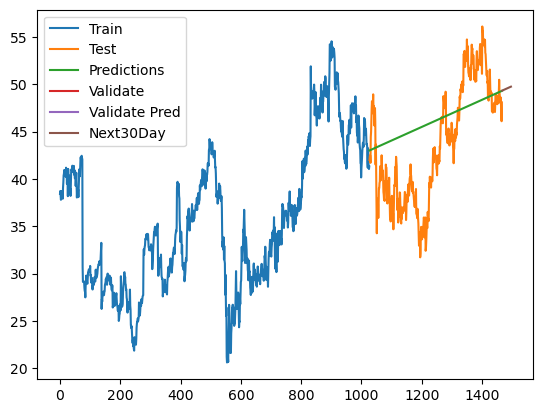

In [11]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Validate Pred','Next30Day'])
plt.show()

In [85]:
test_data.index

RangeIndex(start=1027, stop=1467, step=1)